# 자기상관함수 
시계열분석은 t시점의 값이 그 이전의 값들과 구조적인 연관을 맺고 있다는 가정에서 부터 시작한다. 이것을 자기상관(Auto-Correlation)이라고 한다.본글에서는 ACF(자기상관함수)와 PACF(편자기상관함수)의 모형을 알아 보겠다. 또한 AR/MA 별 ACF/PACF가 어떤 모형을 지니는지 알아보겠다. 

### ACF(Auto-Correlation Function)
ACF는 현재시점부터 과거시점까지의 전체적인 상관관계를 파악한다. 

$$\gamma_y(t,s)= E[(y_t-\mu_t)(y_s-\mu_s)] \\
\rho(t,s)=\frac{\gamma_y(t,s)}{\gamma_y(t,t)\gamma_y(t,s)}$$

### PACF(Partial Auto-Correlation Function)
PACF는 전체의 t길이 시계열에서 특정시점의 시계열이 얼만큼 상관이 있는지 파약한다. 더 구체적으로는 $y_t$와 특정시점의 시계열과 선형적(linear dependence)를 찾는다. 그렇기 때문에 PACF는 하나의 선형회귀식으로 나타낼수 있다. 

$$\tilde{y}_t = \phi_{t1} \tilde{y}_{t-1} + \cdots \phi_{tn} \tilde{y}_{t-n} + e_t \\
*\tilde{y}_t= y_t - \bar{y}$$

PACF는 Yule-Walker식에 따라 하나의 행렬로 나타낼수 있다. 해당 식은 [stat.exchange](https://stats.stackexchange.com/questions/129052/acf-and-pacf-formula)에서 찾았다. 

$$ \begin{eqnarray}
\left(\begin{array}{cccc}\rho(0) & \rho(1) & \cdots & \rho(k-1) \\\rho(1) & \rho(0) & \cdots & \rho(k-2) \\
\vdots & \vdots & \vdots & \vdots \\\rho(k-1) & \rho(k-2) & \cdots & \rho(0) \\\end{array}\right)
\left(\begin{array}{c}\phi_{k1} \\\phi_{k2} \\\vdots \\\phi_{kk} \\\end{array}\right)
= \left(\begin{array}{c}\rho(1) \\\rho(2) \\\vdots \\\rho(k) \\\end{array}\right) \,\end{eqnarray}$$ 

## AR/MA 모델별 ACF/PACF 
* AR(Auto-Regressive) : 과거의 데이터의 가중합(AR:자기회귀)
$$AR(1)\ :\ Y_t = \phi Y_{t-1} + e_t \\
AR(n)\ :\ Y_t = \phi_1 Y_{t-1}+\cdots + \phi_n Y_{t-n} + e_t $$
* MA(Moving Average) : 과거의 예측의 오차의 가중합(MA,이동평균)
$$MA(1) \ : \ Y_t = \mu + e_t - \theta e_{t-1}  \\
MA(n) \ : \ Y_t = \mu + e_t +\cdots - \theta e_{t-n}$$ 
ARIMA(p,d,q)모형에서 p는 AR계수, d는 차분계수,q는 MA계수이다. ARIMA에서 중요한 것은 AR과 MA,그리고 차분계수를 결정하는 것이다. 다양한 테스트를 통해서 찾아볼수 있다. 일반적으로 AR/MA 모형의 함수의 acf/pacf의 관계는 아래와 같다고 알려져 있다. 

|비고|AR(p)|MA(q)|ARMA(p,q)|
|:---:|:---:| :---:|:---:| 
|ACF|점차적으로 감소|시차  q이후에 0|0으로 수렴함,또는 0으로 갑자기 이동|
|PACF|시차 p이후에 0|점차적으로 감소|0으로 수렴함,또는 0으로 갑자기 이동|

파이썬 statsmodel패키지를 통해서, MA/AR모델이 어떤 형태를 보이는지 간단히 그래프를 그래보겠다. 

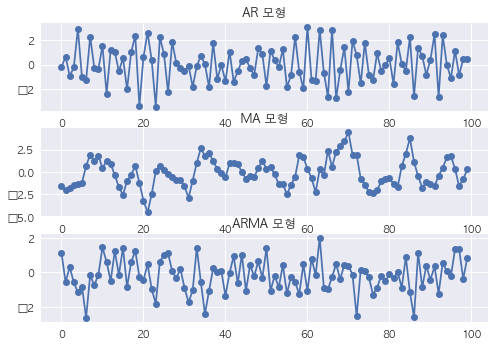

In [21]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
np.random.seed(12345)
from statsmodels.tsa.arima_process import ArmaProcess
matplotlib.rc('font', family="AppleGothic")   

ar_model=ArmaProcess(ar=[1,.9,.8],ma=[1]);ar_sample=ar_model.generate_sample(100)
ma_model=ArmaProcess(ar=[1],ma=[1,.9,.8]);ma_sample=ma_model.generate_sample(100)
arma_model=ArmaProcess(ar=[1,.9,.8],ma=[1,.9,.8]);arma_sample=arma_model.generate_sample(100)

fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1);ax1.plot(ar_sample,'o-');ax1.set_title('AR 모형')
ax2 = fig.add_subplot(3, 1, 2);ax2.plot(ma_sample,'o-');ax2.set_title('MA 모형')
ax3 = fig.add_subplot(3, 1, 3);ax3.plot(arma_sample,'o-');ax3.set_title('ARMA 모형')
plt.show()

AR,MA,ARMA모델의 그래프 모형이 미묘하게 다르다. 개인적인 생각으로 가장 규치적인 패턴은 AR모형이라고 생각한다.MA가 가장 불규칙하고....(이 표현이 맞는지 모르겠다....)

위 모델의 ACF/PACF그래프를 살펴보겠다. 

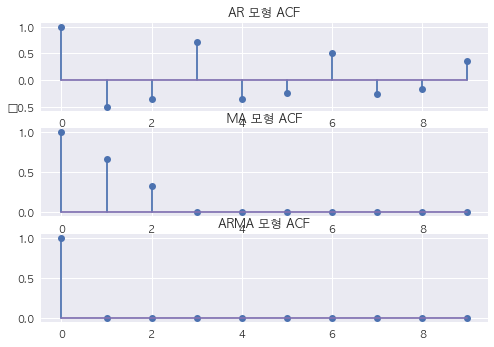

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1);ax1.stem(ar_model.acf(10));ax1.set_title('AR 모형 ACF')
ax2 = fig.add_subplot(3, 1, 2);ax2.stem(ma_model.acf(10));ax2.set_title('MA 모형 ACF')
ax3 = fig.add_subplot(3, 1, 3);ax3.stem(arma_model.acf(10));ax3.set_title('ARMA 모형 ACF')
plt.show()

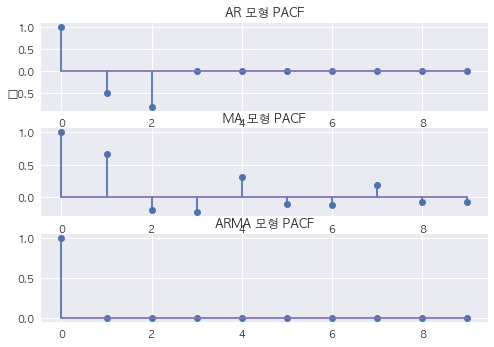

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1);ax1.stem(ar_model.pacf(10));ax1.set_title('AR 모형 PACF')
ax2 = fig.add_subplot(3, 1, 2);ax2.stem(ma_model.pacf(10));ax2.set_title('MA 모형 PACF')
ax3 = fig.add_subplot(3, 1, 3);ax3.stem(arma_model.pacf(10));ax3.set_title('ARMA 모형 PACF')
plt.show()